In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [114]:
df = pd.read_csv('Concrete Compressive Strength.csv')
df.head(10)

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age (day),Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [115]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age (day),Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age (day)                      1030 non-null   int64  
 8   Concrete_Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [117]:
#data cleaning
df.isna().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age (day)                        0
Concrete_Compressive_Strength    0
dtype: int64

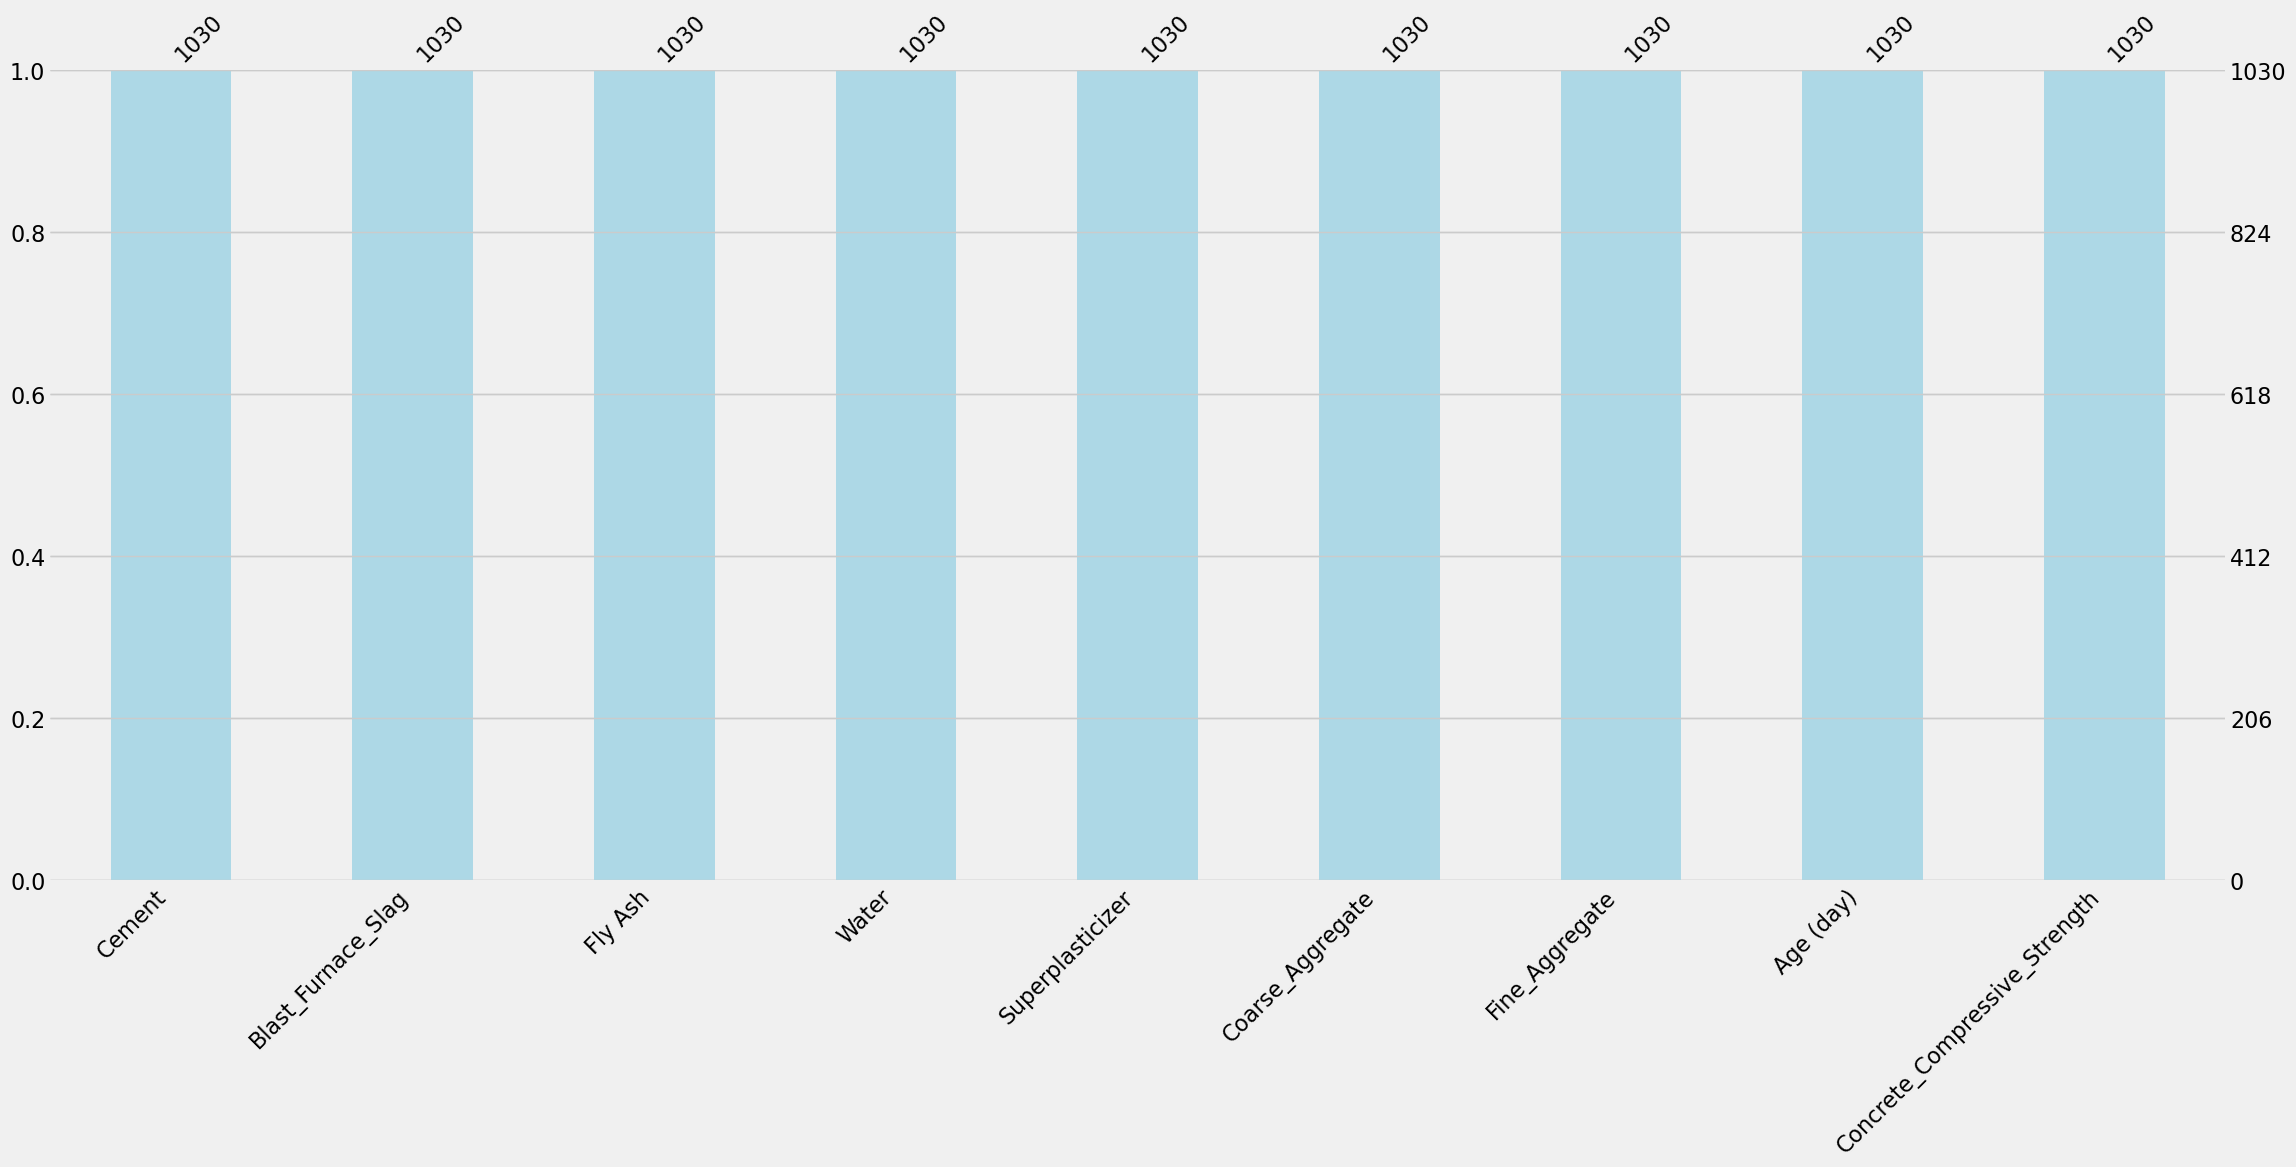

In [118]:
#visualizing missing values

msno.bar(df, color = "lightblue")
plt.show()

outlier detection

In [64]:
df.head(10)

,Cement,Blast_Furnace_Slag,Fly Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age (day),Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


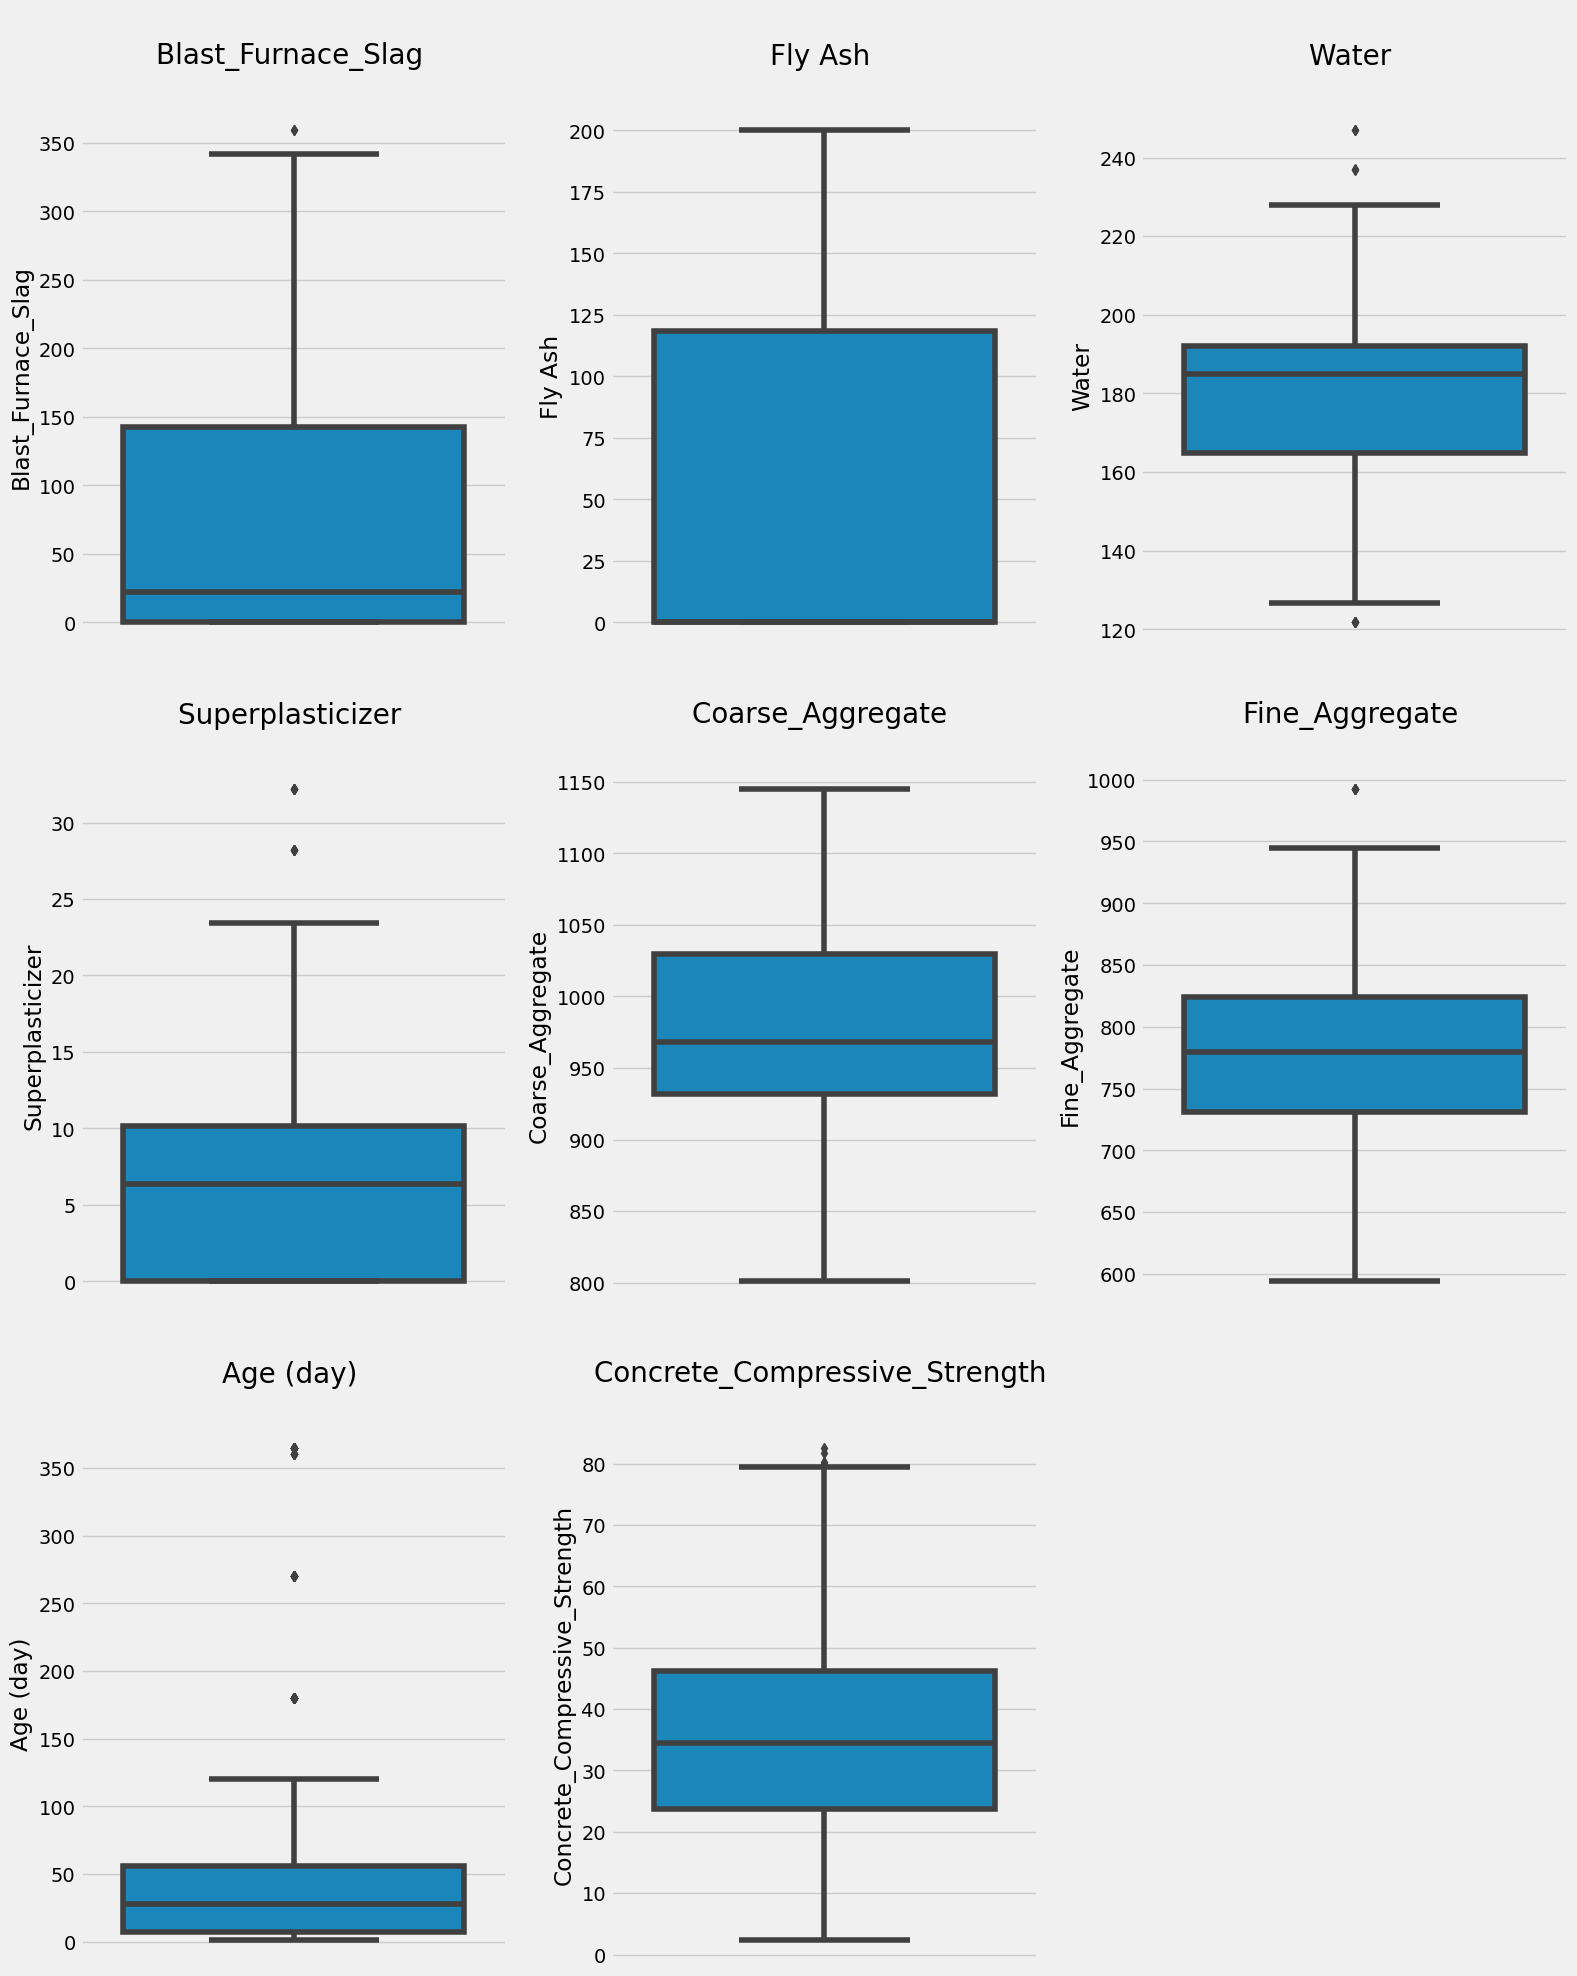

In [65]:
cols = df.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

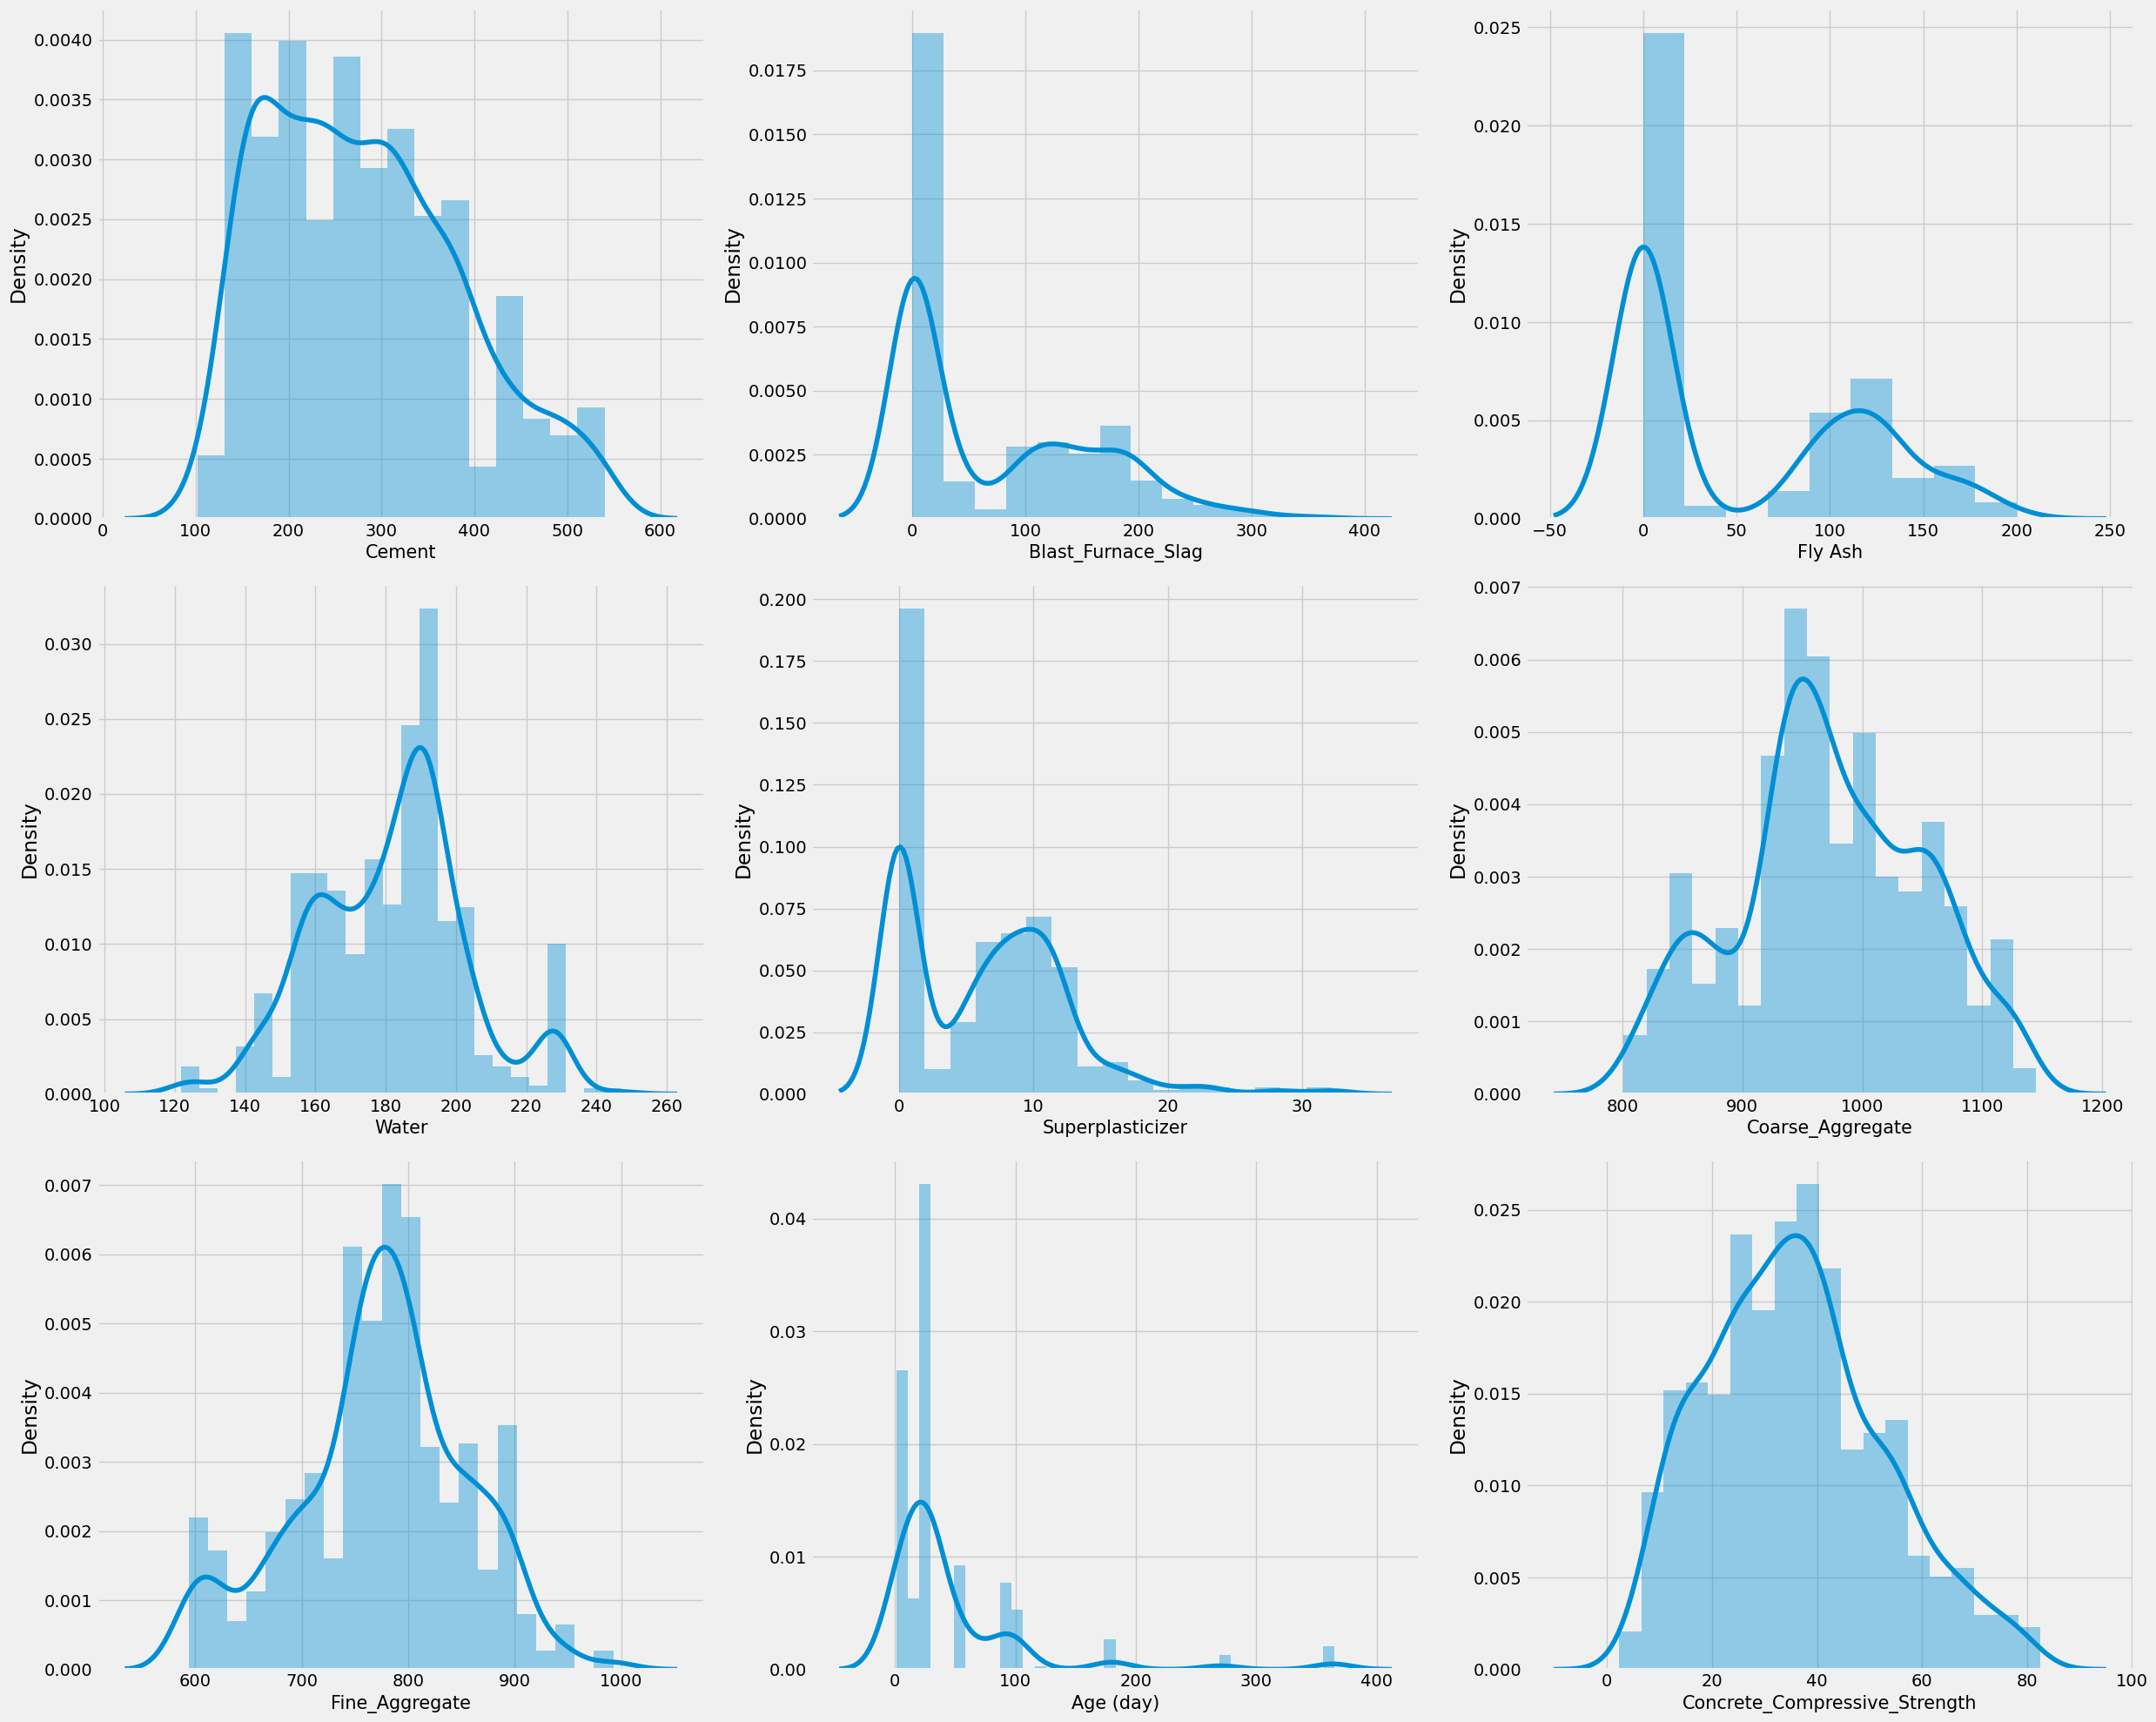

In [119]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Correlation analysis

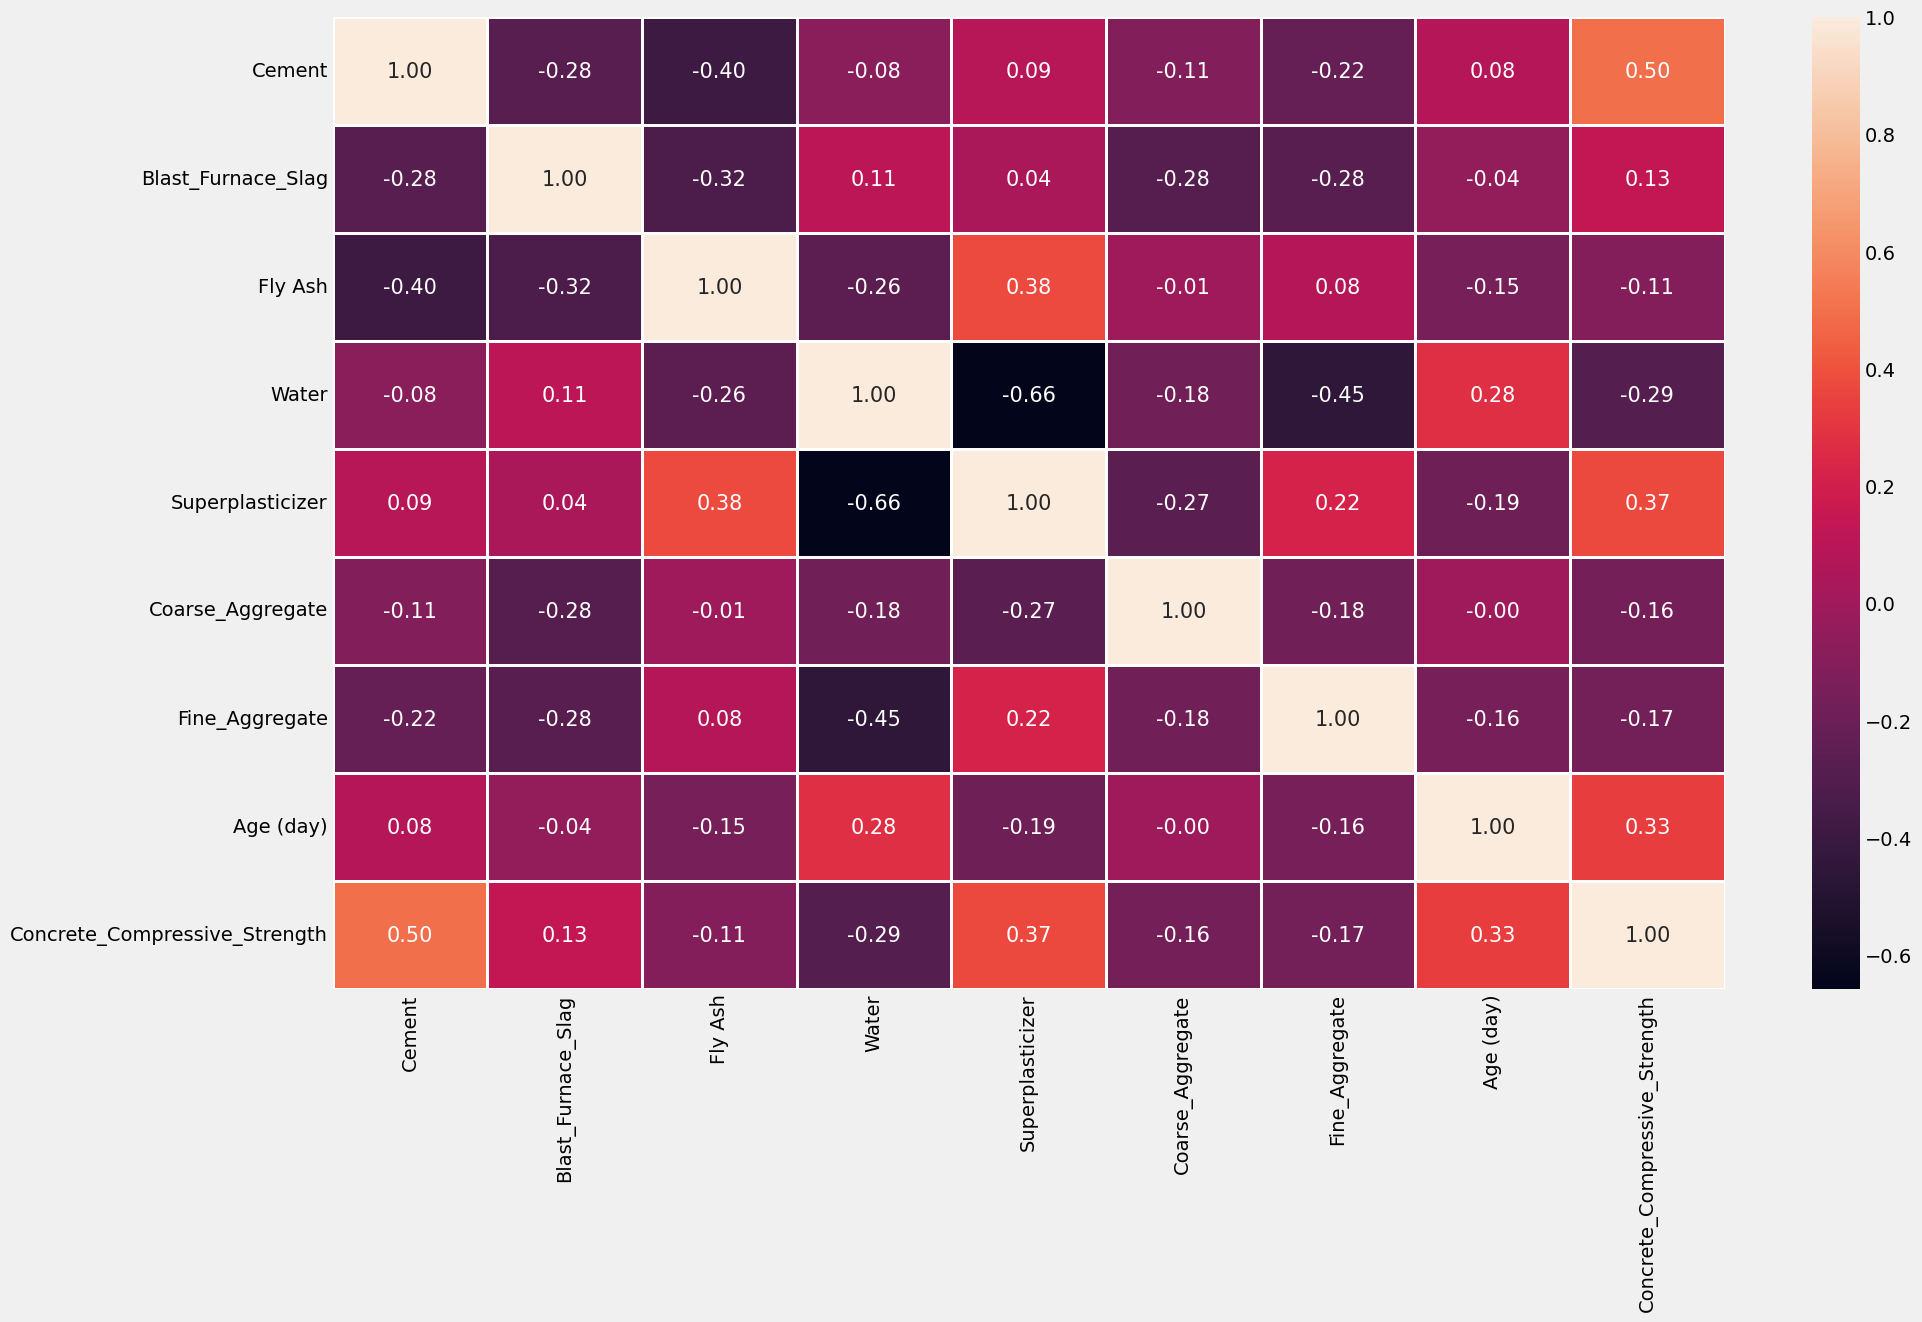

In [120]:
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.show()

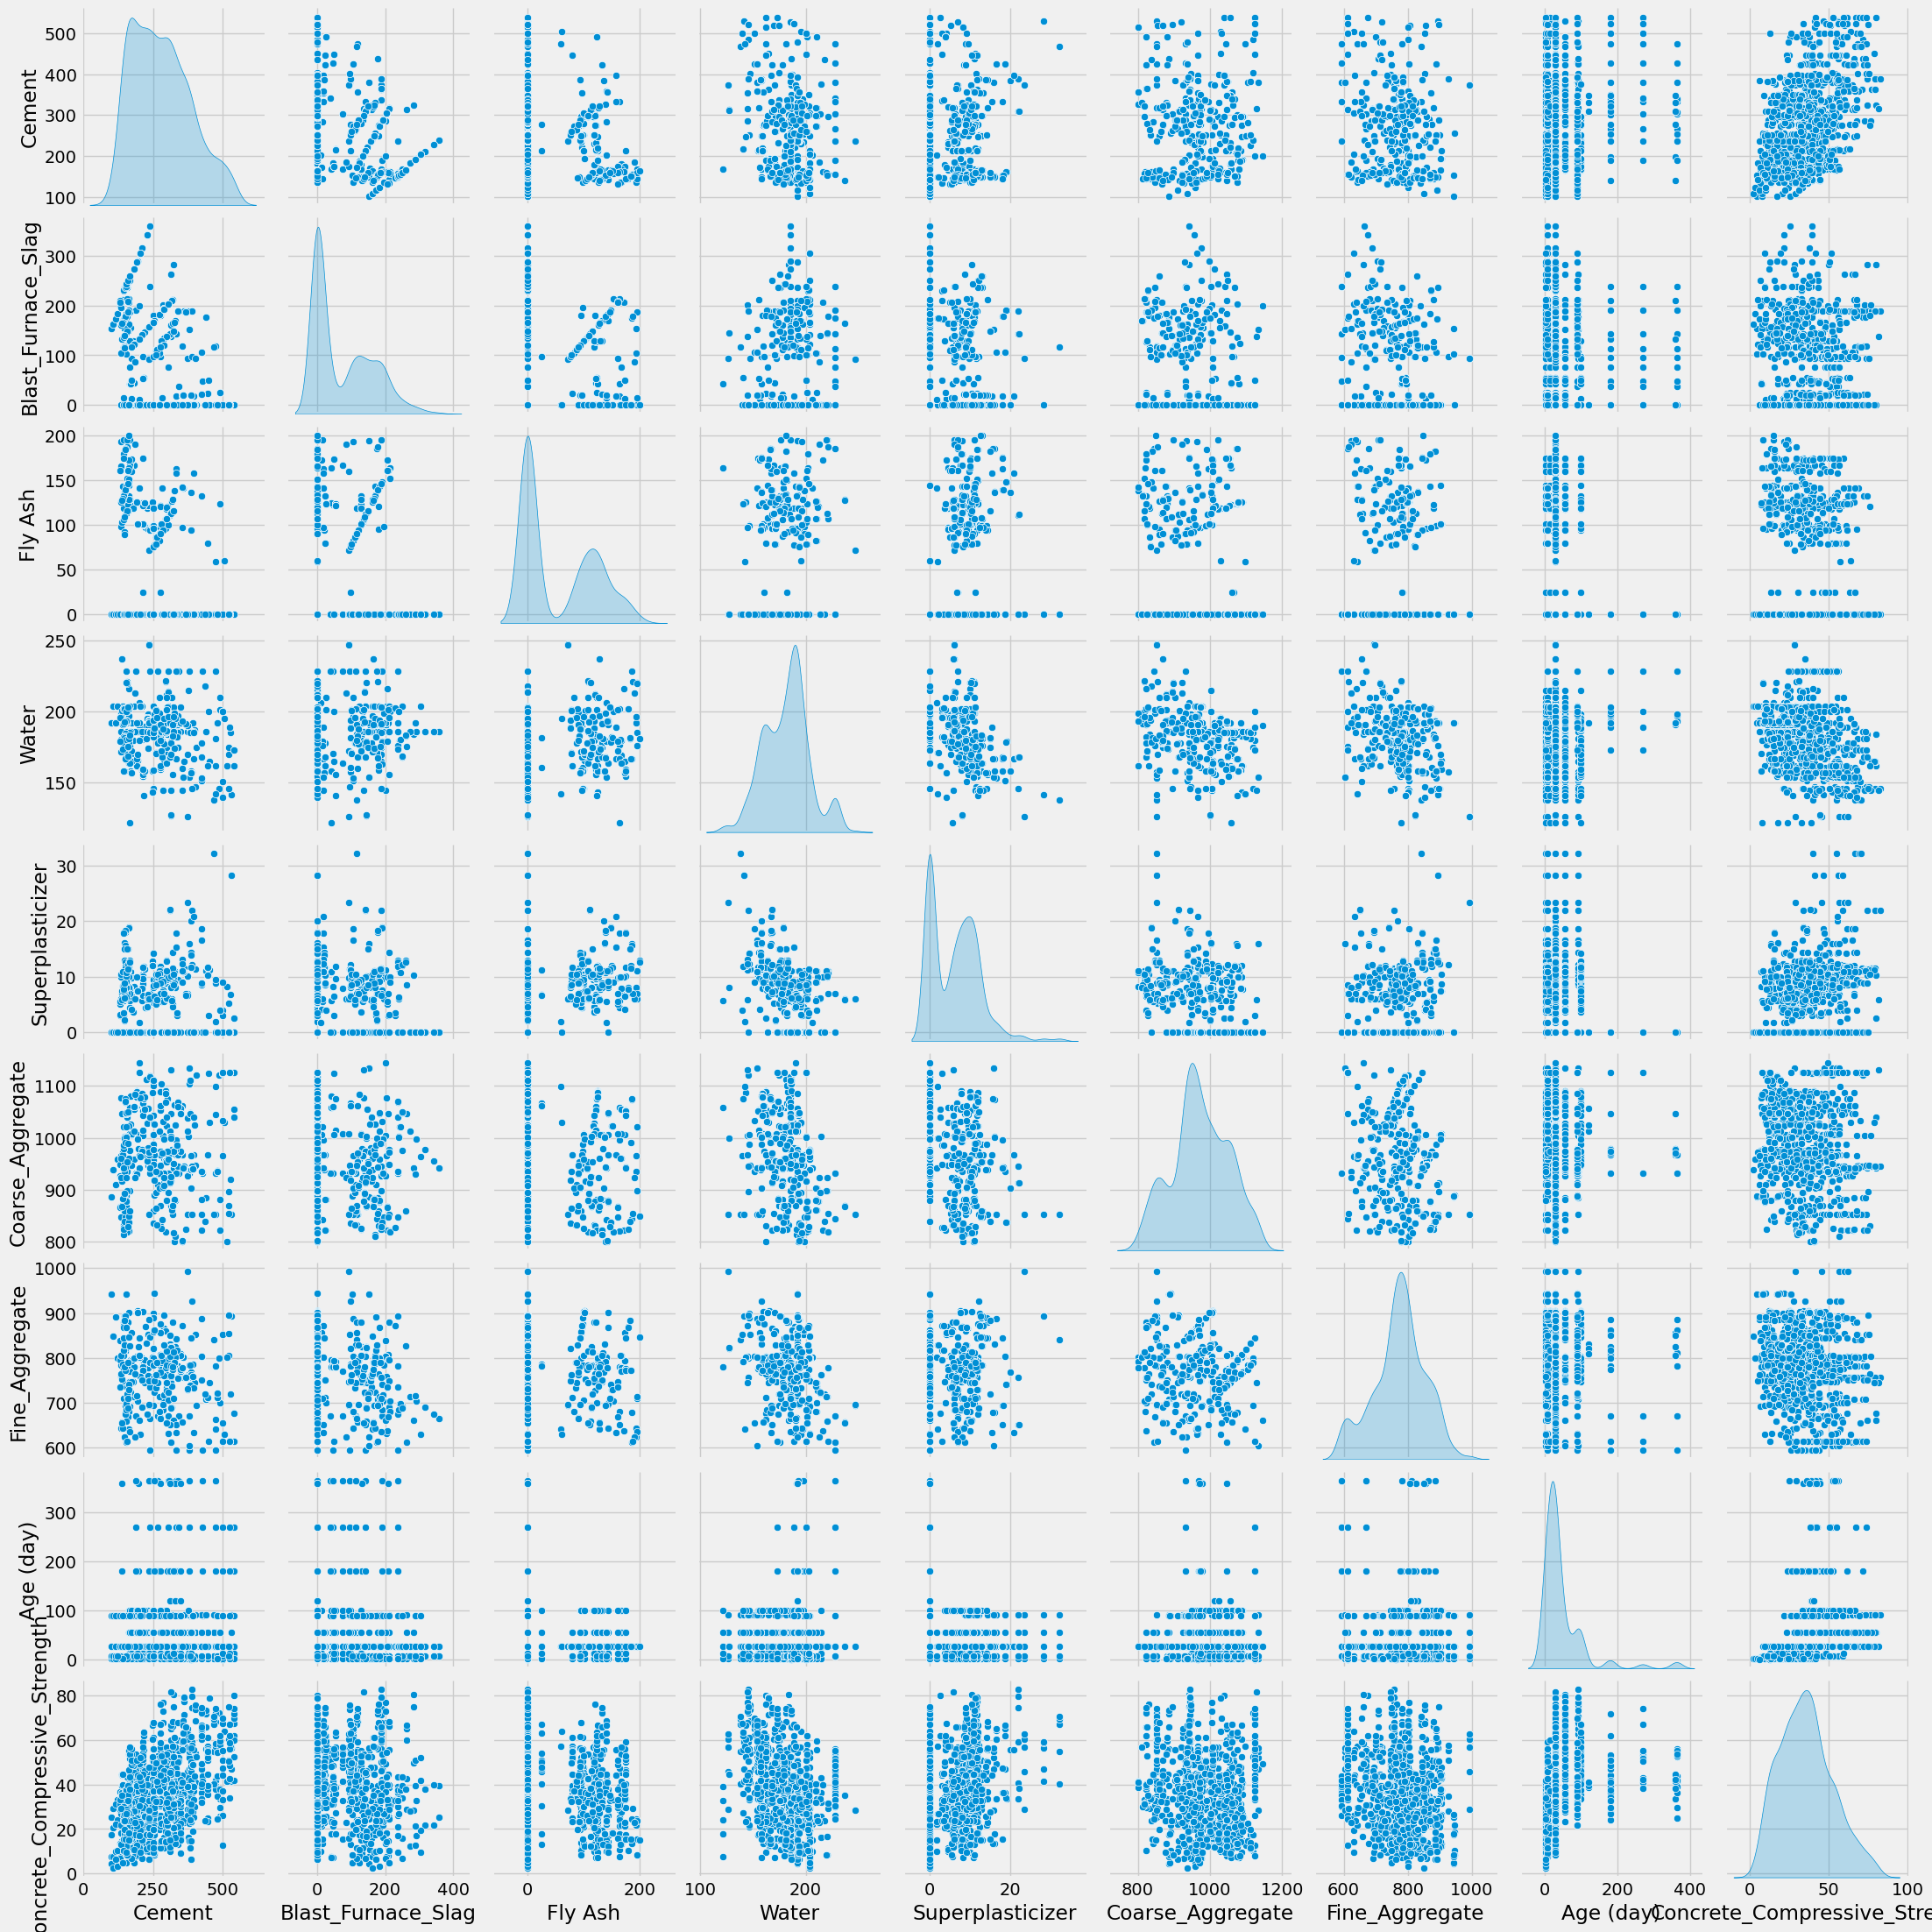

<Figure size 640x480 with 0 Axes>

In [68]:
sns.pairplot(df, diag_kind='kde')
plt.show()
plt.savefig('pairplot.png')

In [121]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [122]:
X.var()

Cement                10921.742654
Blast_Furnace_Slag     7444.083725
Fly Ash                4095.548093
Water                   456.060245
Superplasticizer         35.682602
Coarse_Aggregate       6045.656228
Fine_Aggregate         6428.099159
Age (day)              3990.437729
dtype: float64

features normalizing

In [123]:
for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

after normalizing checking for outlier again

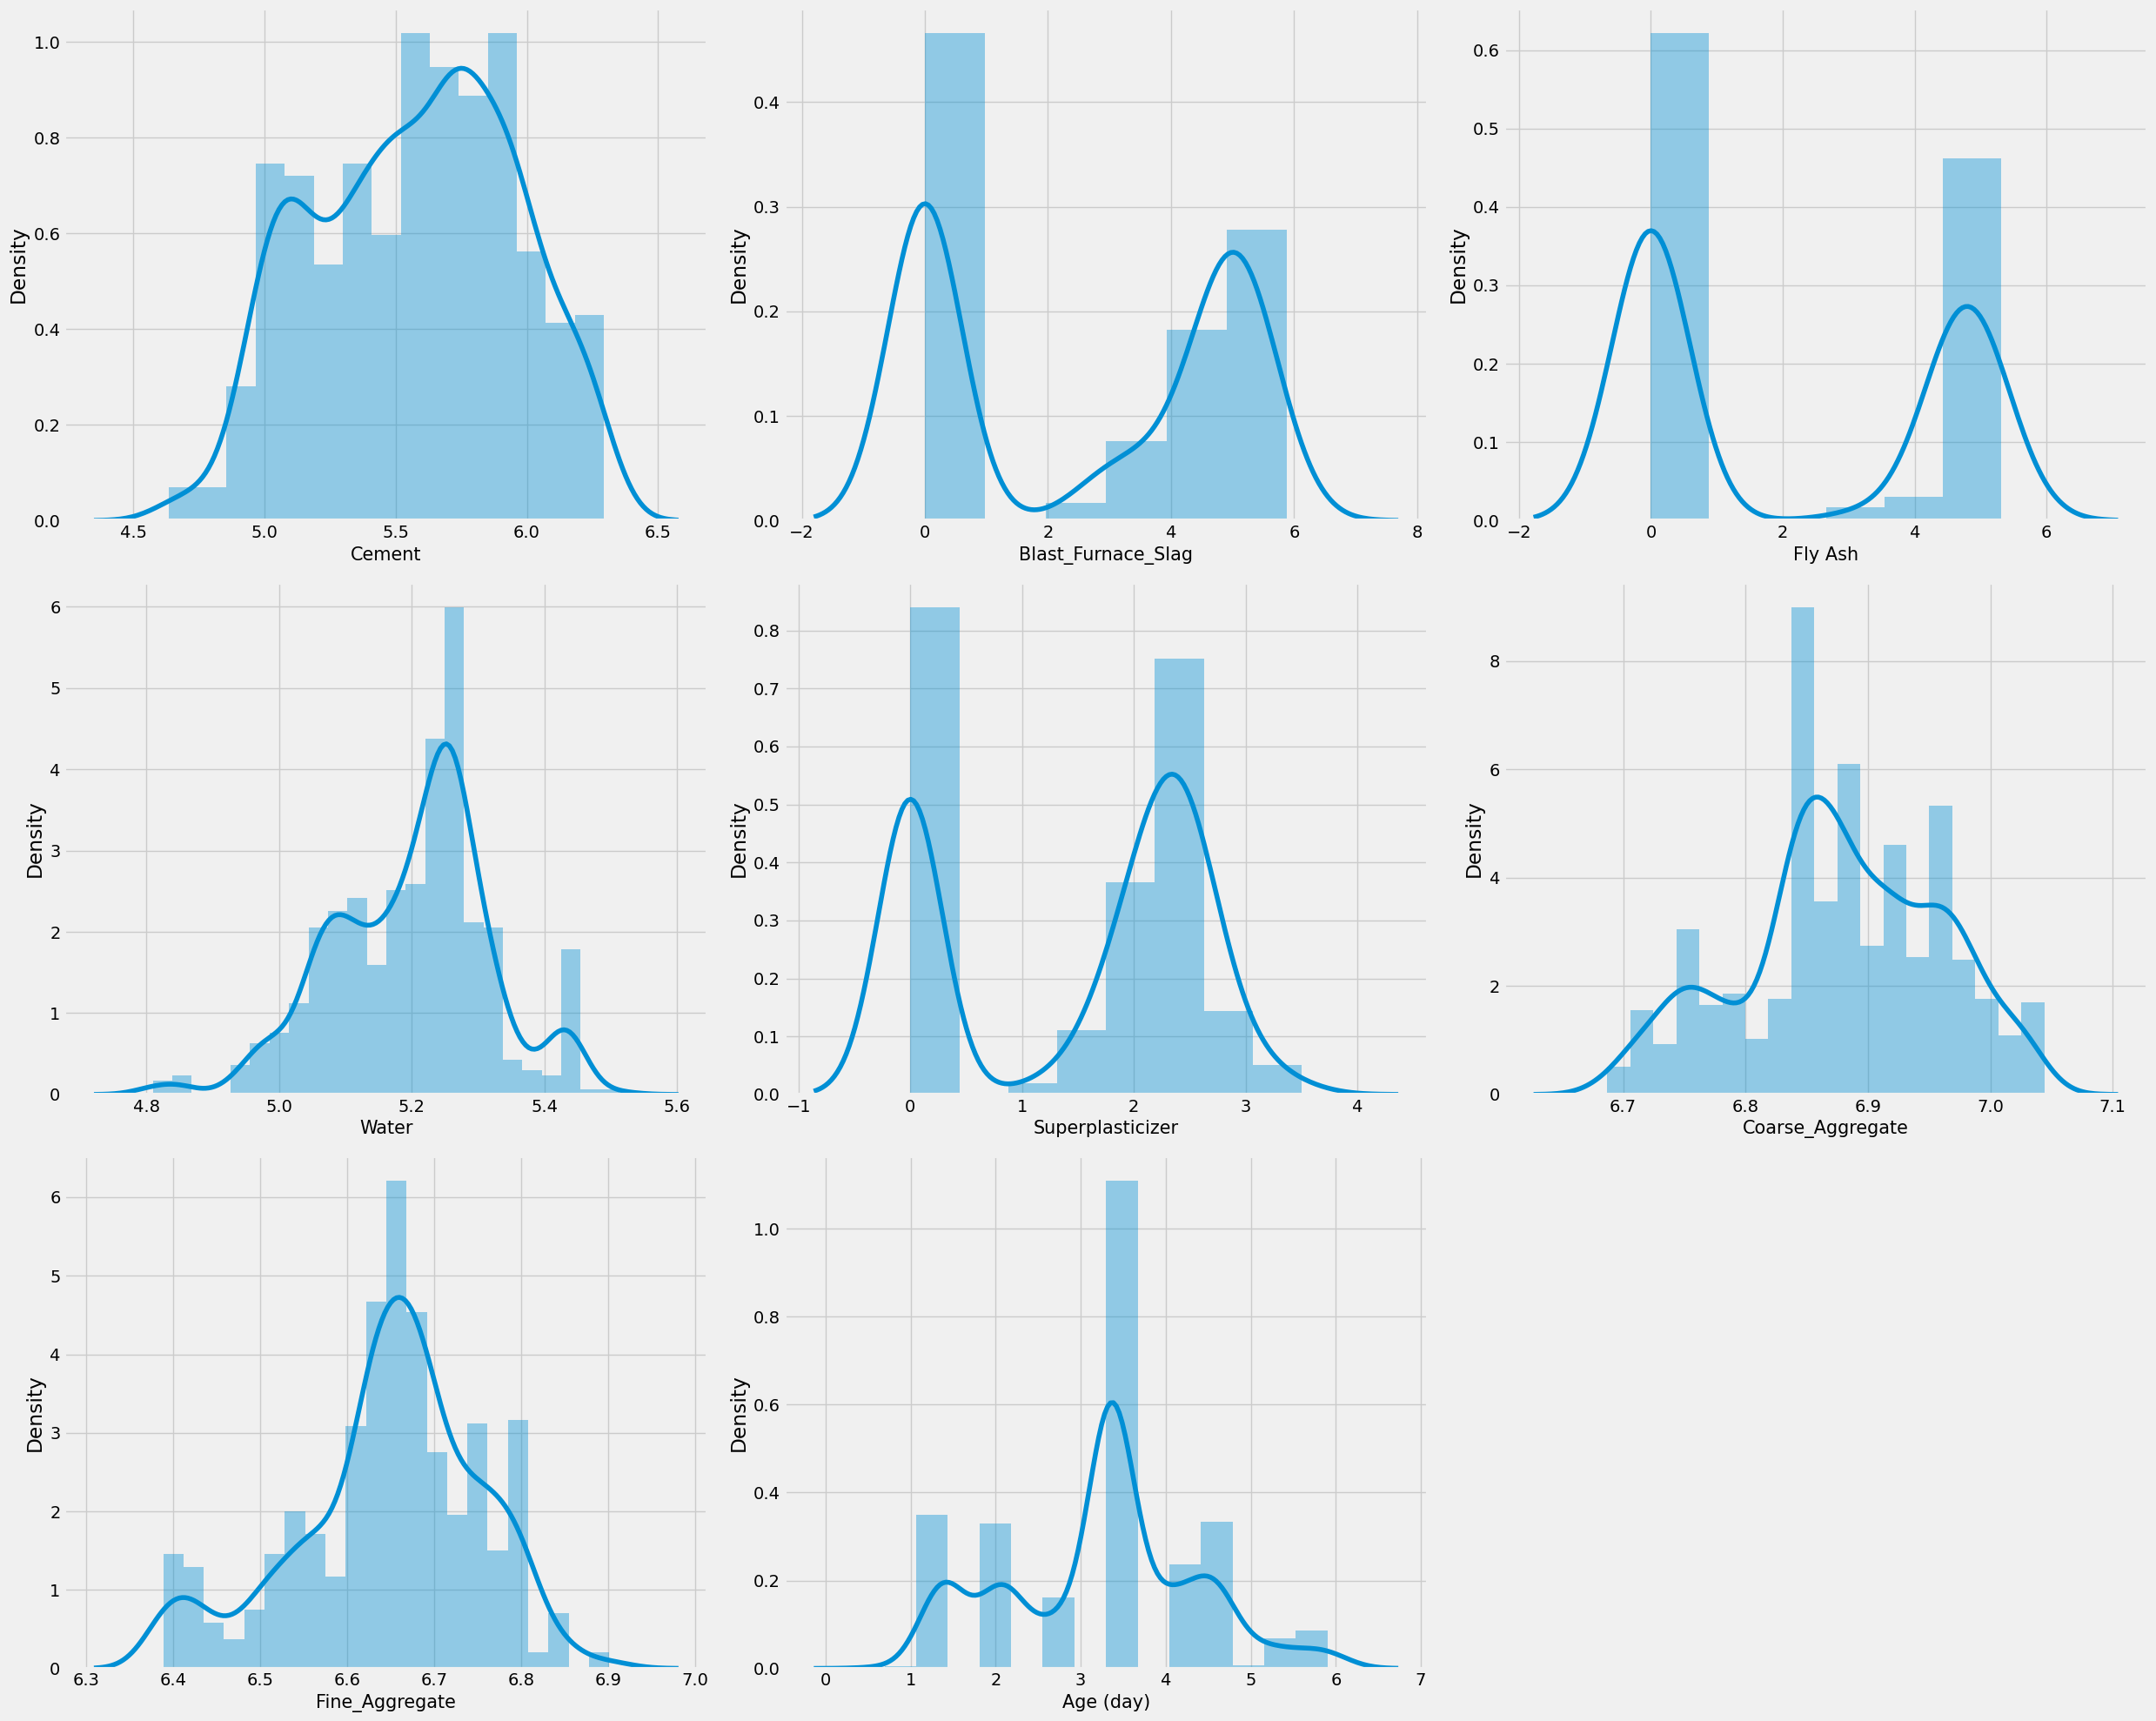

In [124]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

splitting data into training and test set

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [126]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

Linear Regression

In [127]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
fited_model = lr.fit(X_train, y_train)
fited_model

LinearRegression()

In [128]:
coefficients = fited_model.coef_

intercept = fited_model.intercept_
print("regression coefficients :", coefficients)
print("intercept :",intercept)

regression coefficients : [ 9.07069906  5.45969187  0.56147477 -3.84320714  3.33962293  0.26857395
 -0.91652784  9.46879712]
intercept : 36.008285617004894


In [129]:
y_pred = lr.predict(X_test)
y_pred[:10]

array([50.65797651, 42.54199466, 22.54263844, 36.61903897, 31.59961134,
       51.43918226, 22.9981    , 31.05586153, 20.01252028, 34.14190193])

In [130]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 55.82230830697709
R2 Score: 0.8062486733239966
Mean Absolute Error: 5.53


In [79]:
lr.score(X_train, y_train)

0.8098470445823973

In [80]:
lr.score(X_test, y_test)

0.7752606023236107